In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_customer=pd.read_csv("C:/Users/anush/OneDrive/Data Analyst/Portfolio/Python telecom Churn/New 1/telecom_customer_churn.csv")

In [4]:
data_customer.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [5]:
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [43]:
#removing irrelevant columns

data_customer.drop(columns = ['Customer ID', 'Zip Code', 'Latitude', 'Longitude'],axis=1 ,inplace = True)

KeyError: "['Customer ID', 'Zip Code', 'Latitude', 'Longitude'] not found in axis"

(array([0, 1, 2]),
 [Text(0, 0, 'Stayed'), Text(1, 0, 'Churned'), Text(2, 0, 'Joined')])

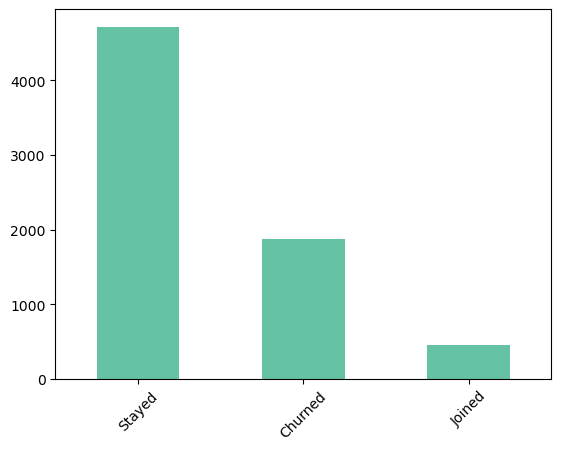

In [7]:
data_customer["Customer Status"].value_counts().plot(kind='bar',stacked=True, colormap = 'Set2')
plt.xticks(rotation=45)

In [8]:
#removing joined categories since it doesn't provide valuable information about churn rate

data_customer = data_customer[data_customer["Customer Status"]!= "Joined"]
len(data_customer)

6589

In [9]:
#Exploring Churn Reasons

<Axes: xlabel='count', ylabel='Churn Reason'>

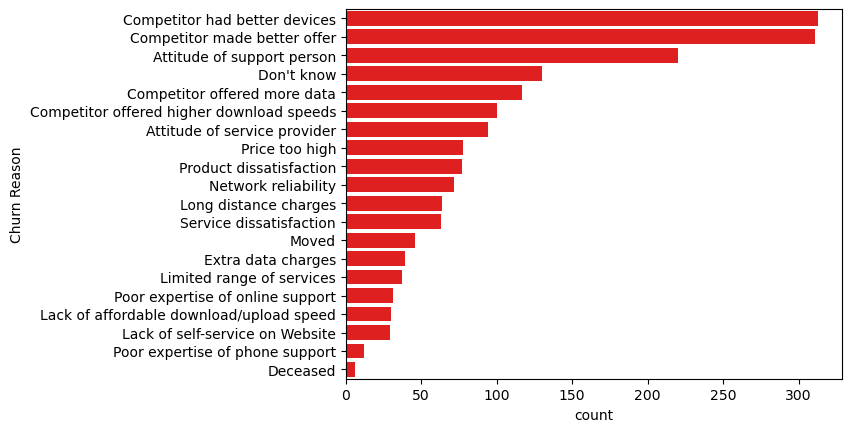

In [11]:
sns.countplot(data=data_customer,y="Churn Reason",order = data_customer["Churn Reason"].value_counts().index,color = 'red')

In [12]:
#From these 2 plots we can start to have an idea about the Customer Churn Reasons so Most of the churn was because that
#1.The competitor was most frequent
#2.This company had a bad Attitude and Service
#3.company services seems to be expensive

In [13]:
#Exploring Numerical / Categorical Features

In [18]:
#Numerical
cat  = list(data_customer.select_dtypes(include='object').columns)
num = list(data_customer.select_dtypes(exclude='object').columns)

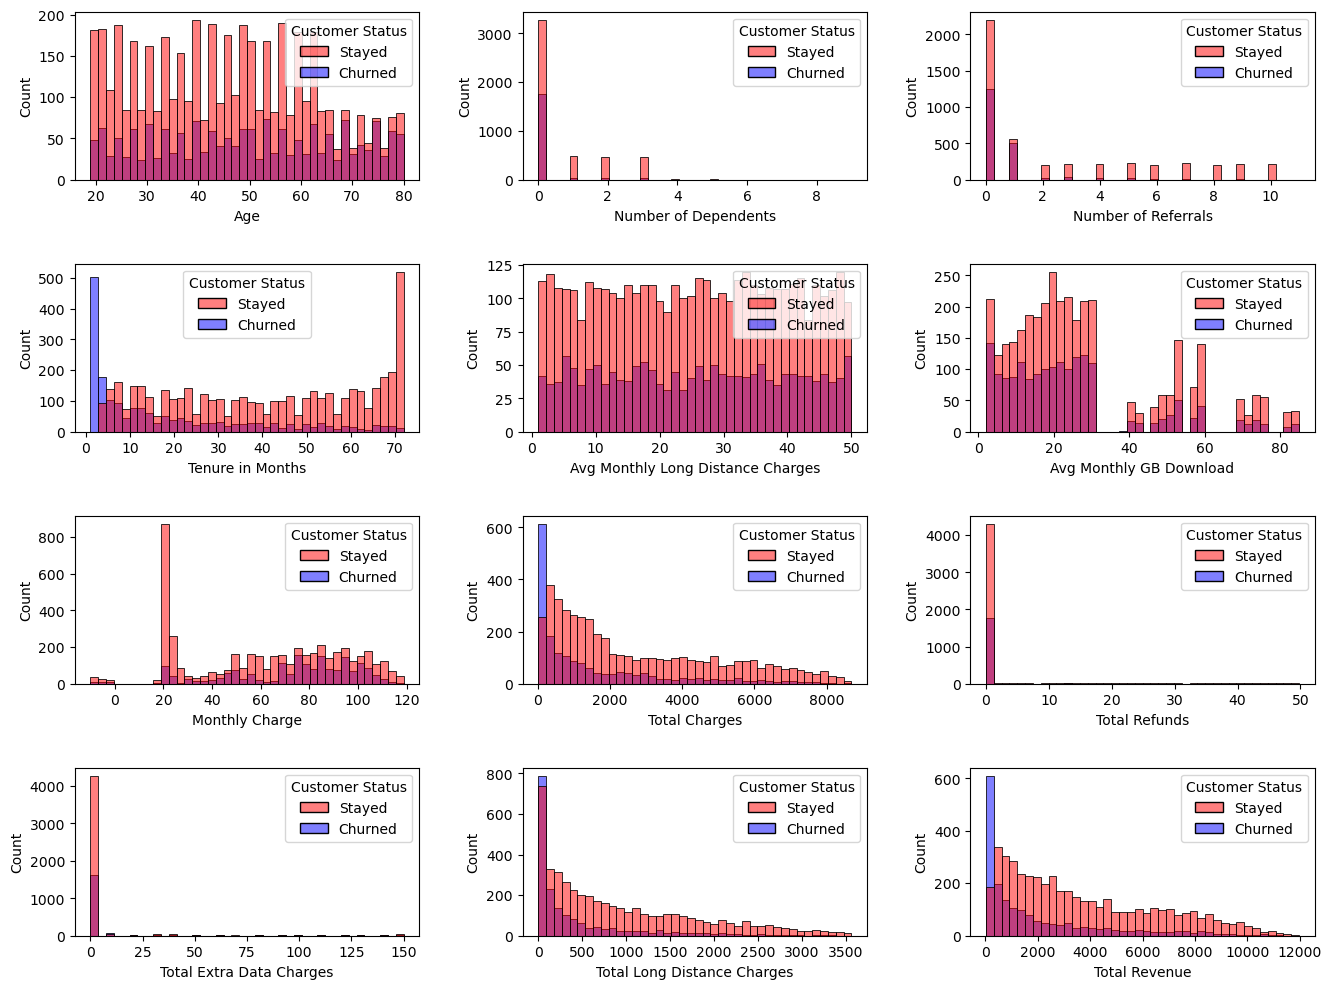

In [15]:
fig, axes = plt.subplots(4,3 , figsize=(16,12))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
axes = axes.flatten()
for i in range(len(num)):
    sns.histplot(x = data_customer[num[i]], hue = data_customer['Customer Status'], palette = ["red","blue"], bins = 40,ax=axes[i])

In [16]:
#1.Tenure:A customer is more likely to churn in the first 4 months since he joined
#2. Total Charges We can notice that the amount of Total charge for churn customers is significantly lower than the Stayed in customers

<Axes: >

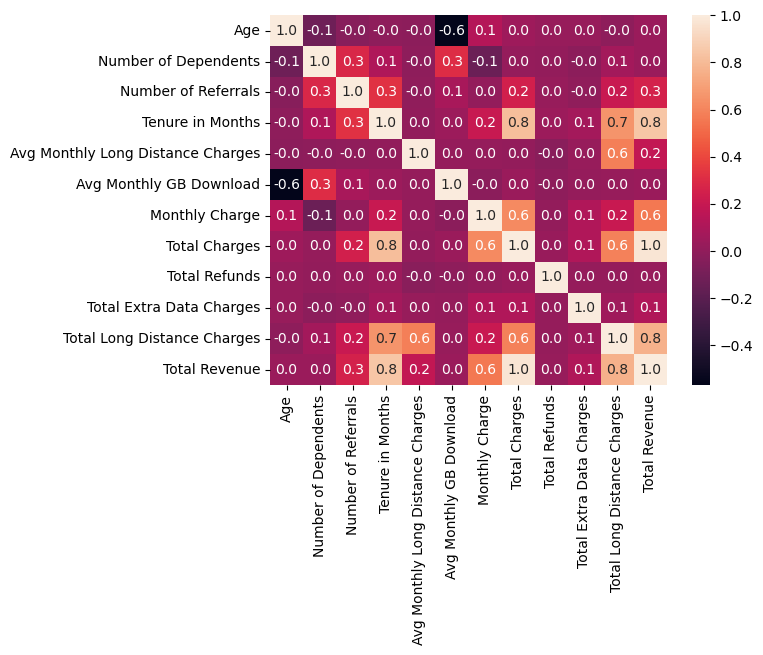

In [17]:
sns.heatmap(data_customer[num].corr(), annot = True,fmt='.1f') 

In [19]:
#No significant correlation seems to exist between above variables

In [20]:
#Categorical. Use the plots below to have an understanding how does how catagorical features influence the Churn rate

In [21]:
cat.remove("City")
cat.remove("Churn Category")
cat.remove("Churn Reason")

In [ ]:
#Countplot

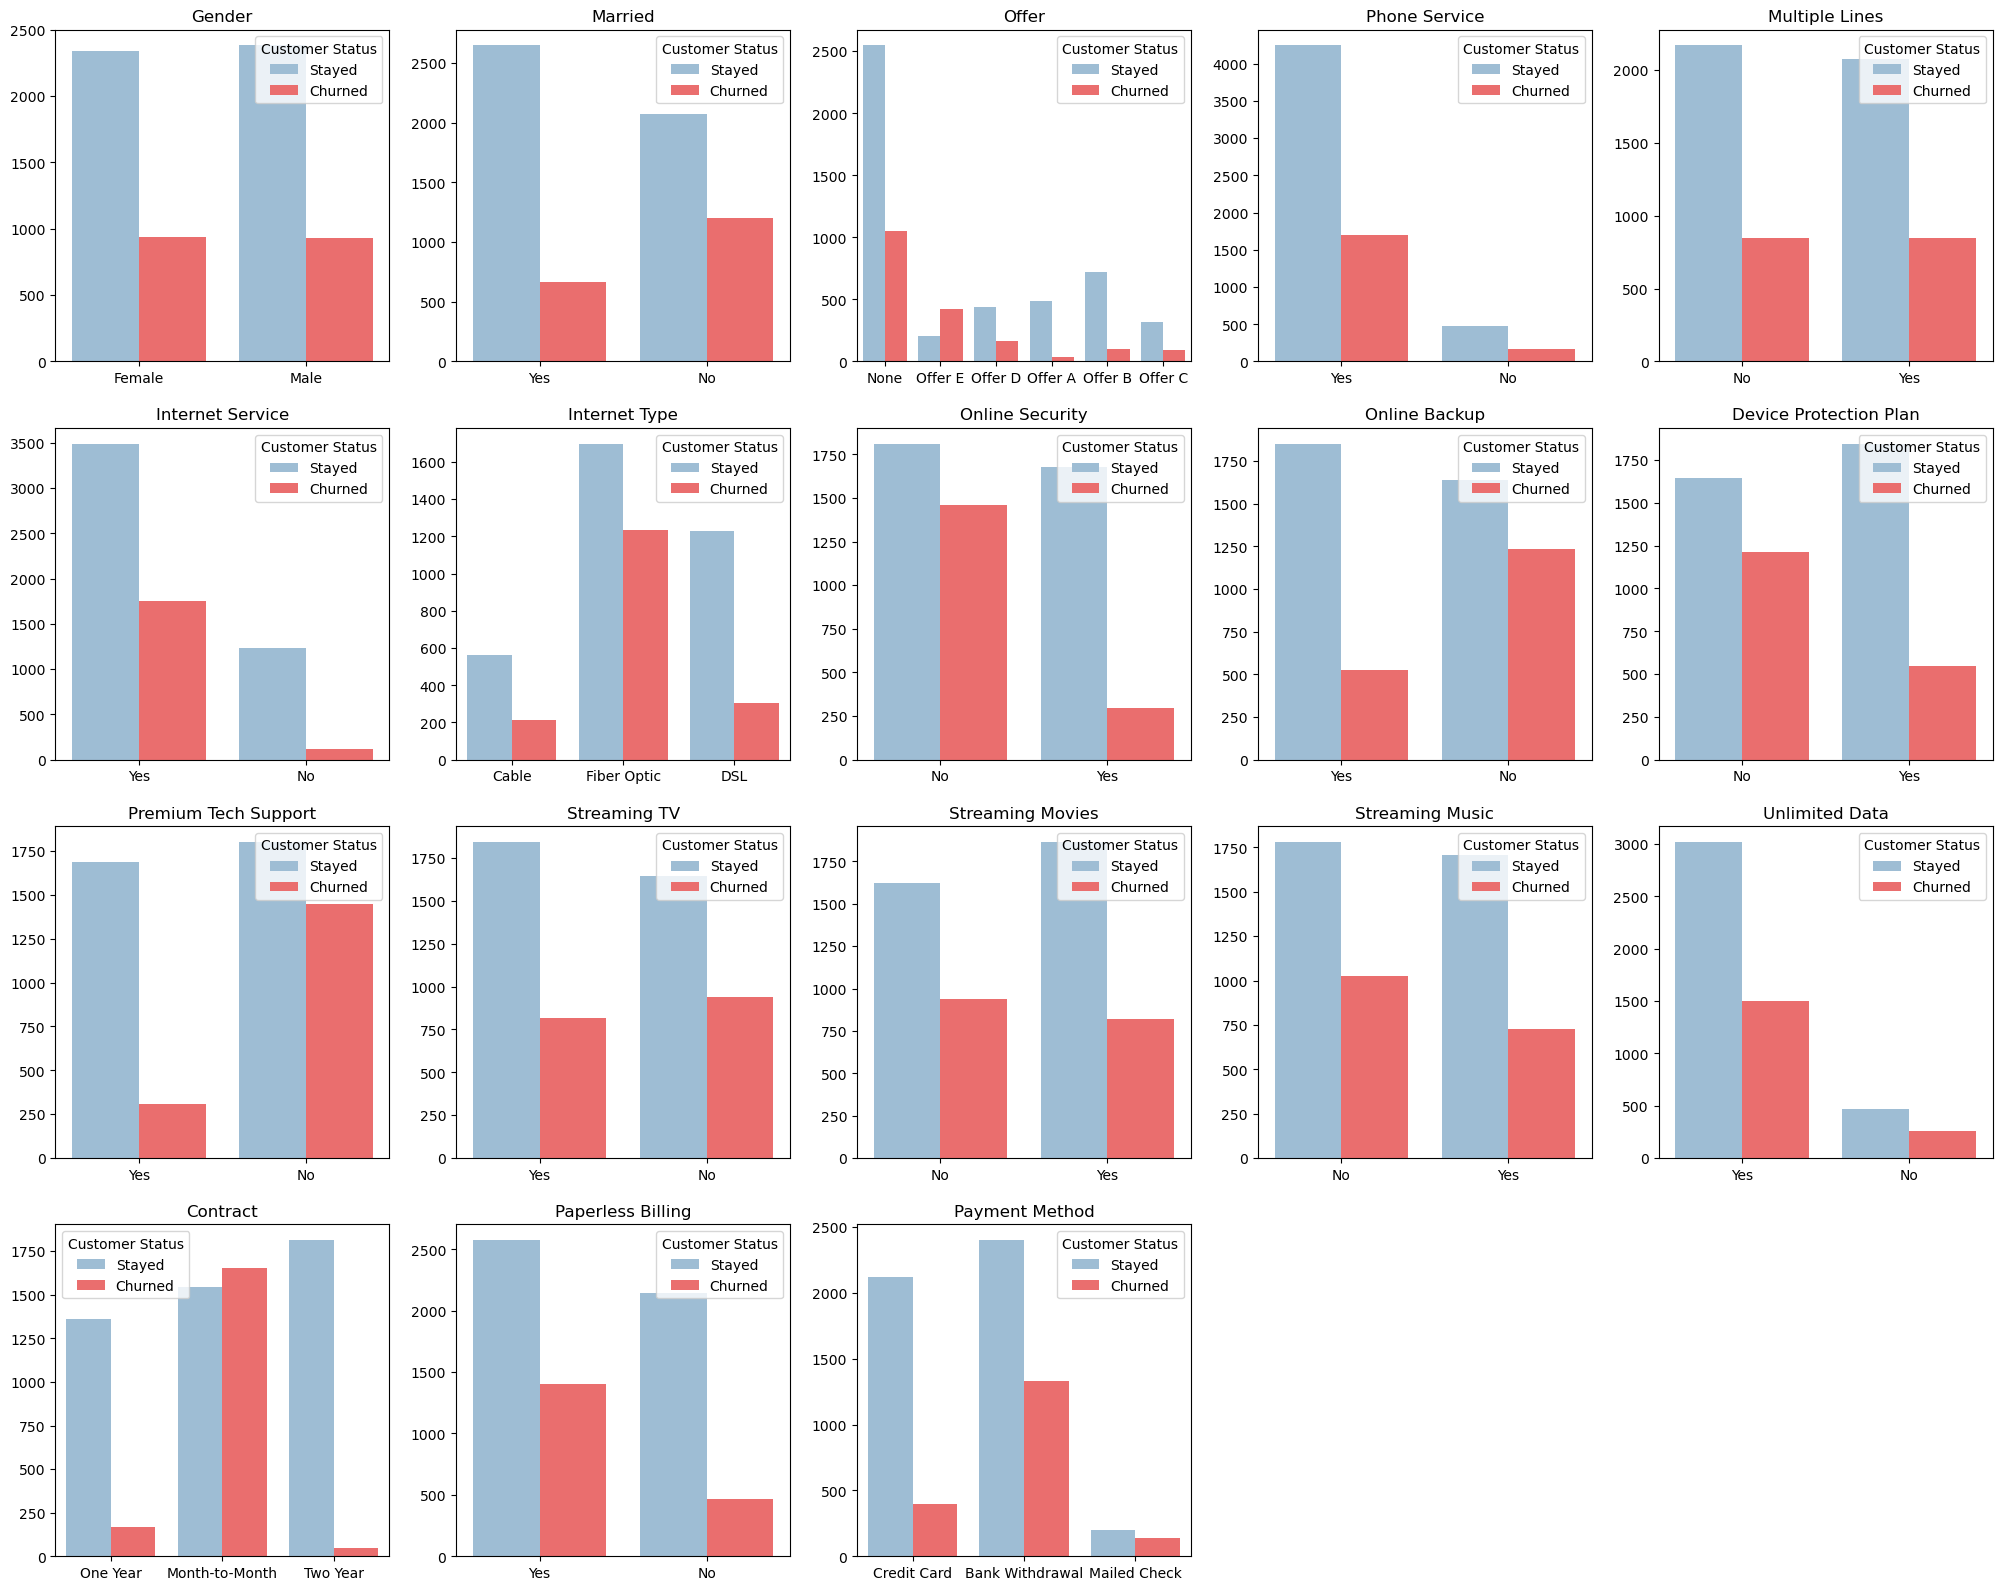

In [22]:
fig = plt.figure(figsize = (25, 25))
data_cat=data_customer[cat]
i=1
for x in cat[:-1]:
    plt.subplot(5, 5, i)
    ax=sns.countplot(data =data_cat , x = data_cat[x], hue ='Customer Status', palette = ["#95BEDD", '#FF5959'])
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(x), loc='center')
    i+=1
plt.show()

In [24]:
#LinePlot

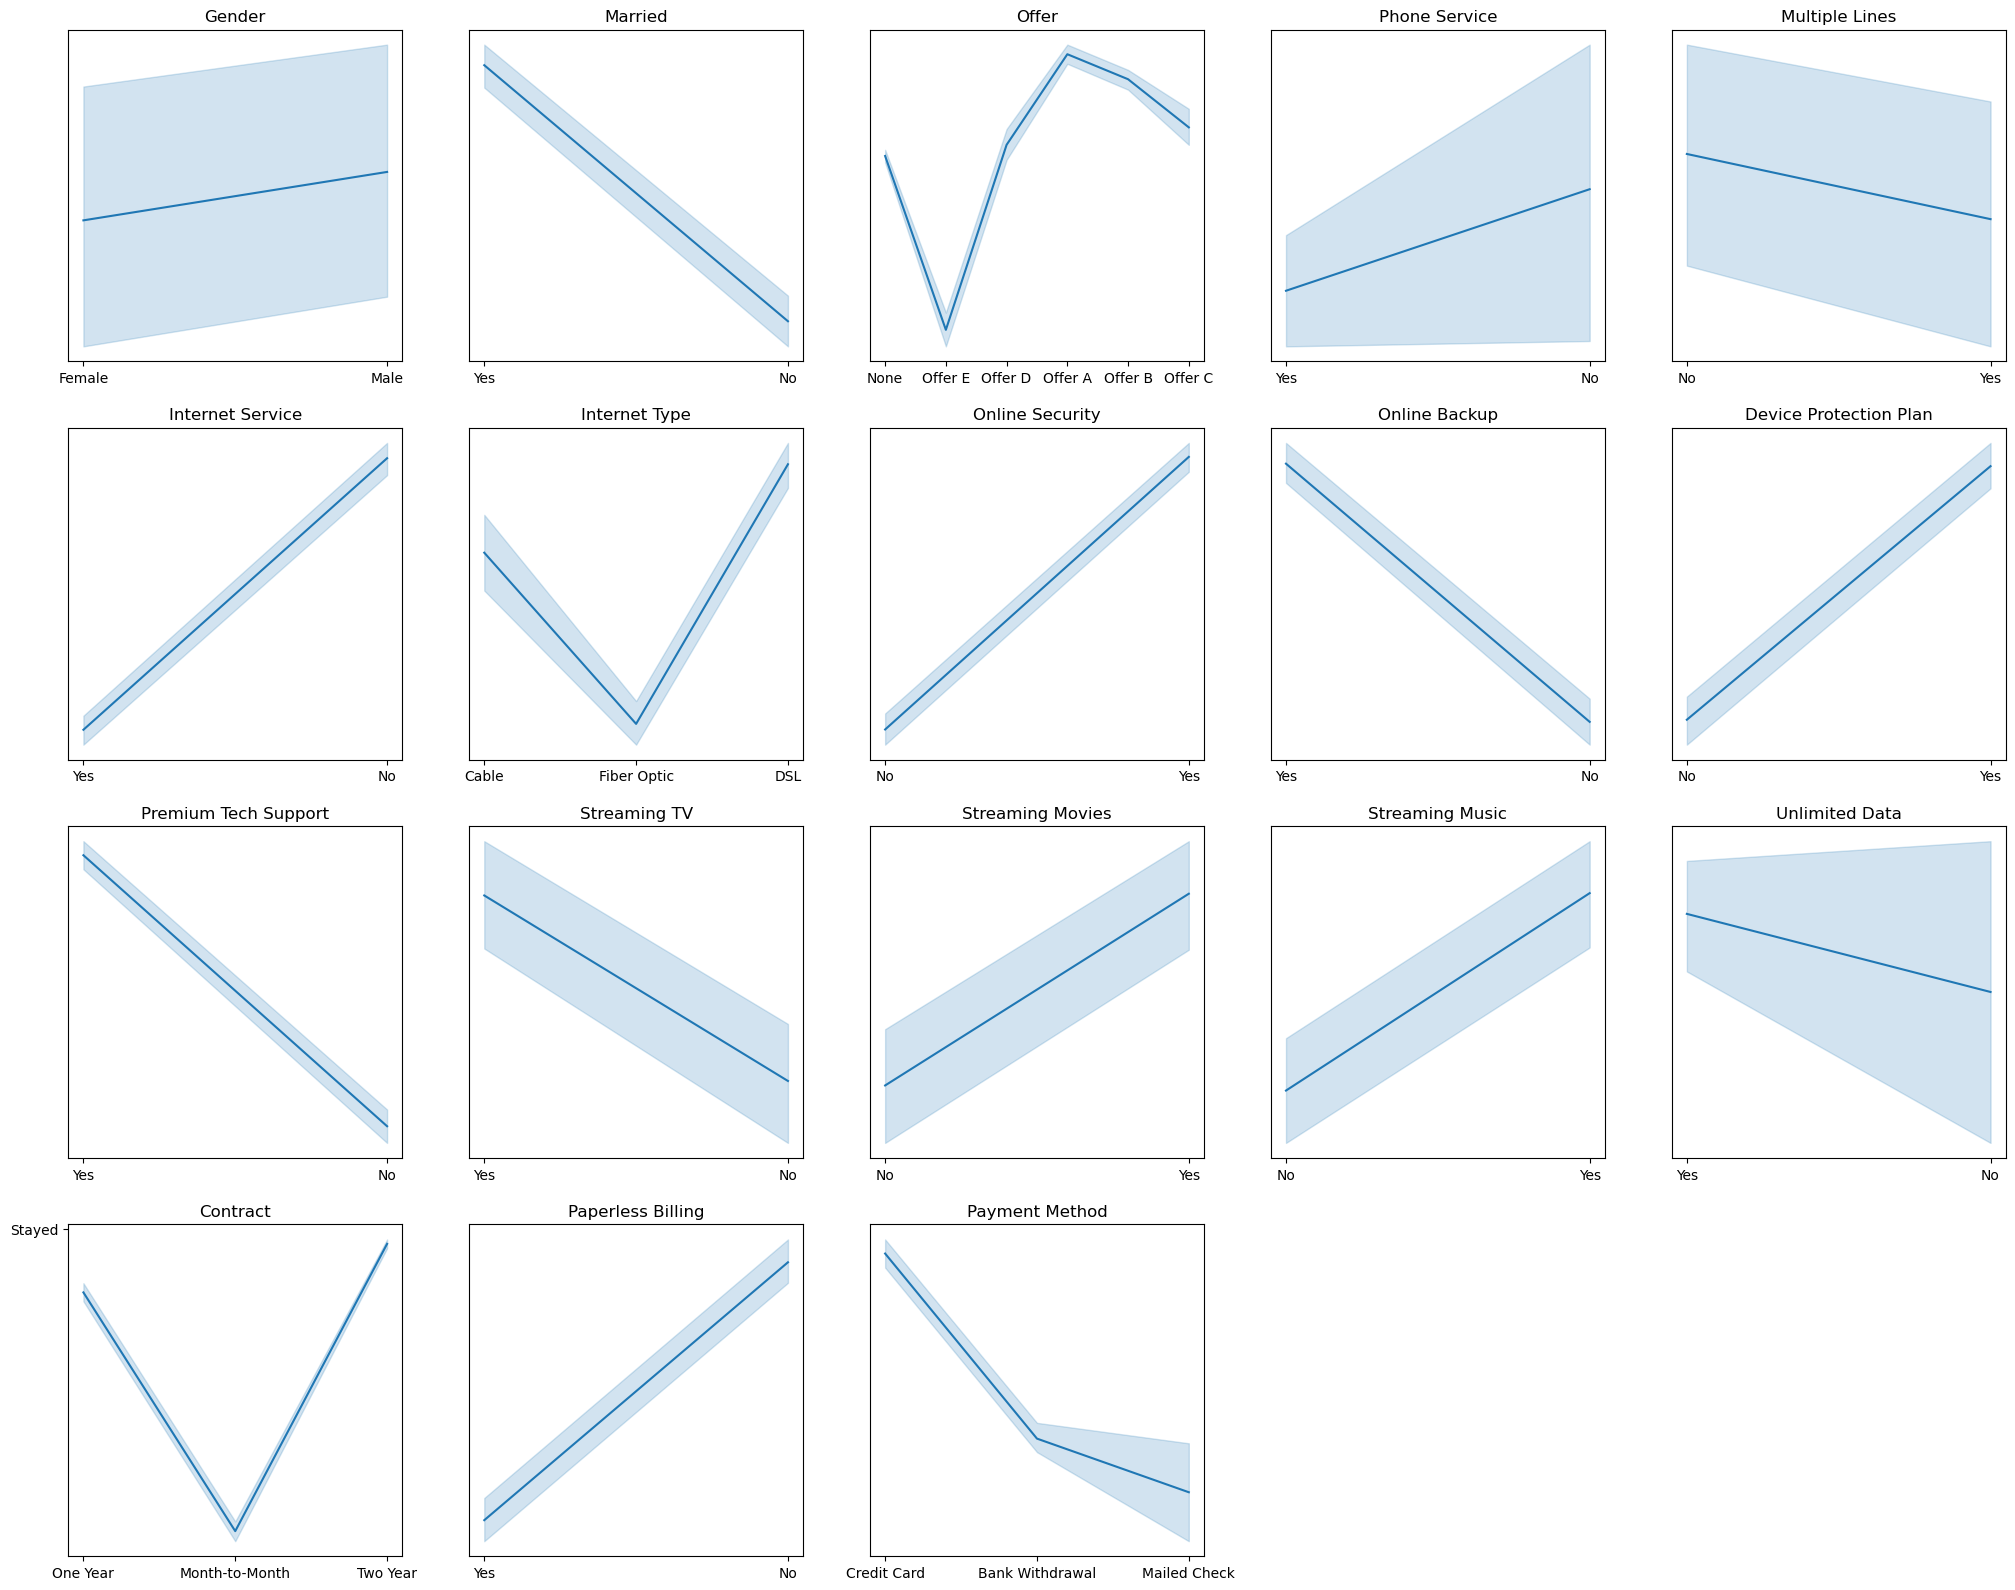

In [25]:
fig = plt.figure(figsize = (25, 25))
data_cat=data_customer[cat]
i=1
for x in cat[:-1]:
    plt.subplot(5, 5, i)
    ax=sns.lineplot(data =data_cat , x = data_cat[x],y ='Customer Status')
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(x), loc='center')
    i+=1
plt.show()

In [26]:
#PieChart

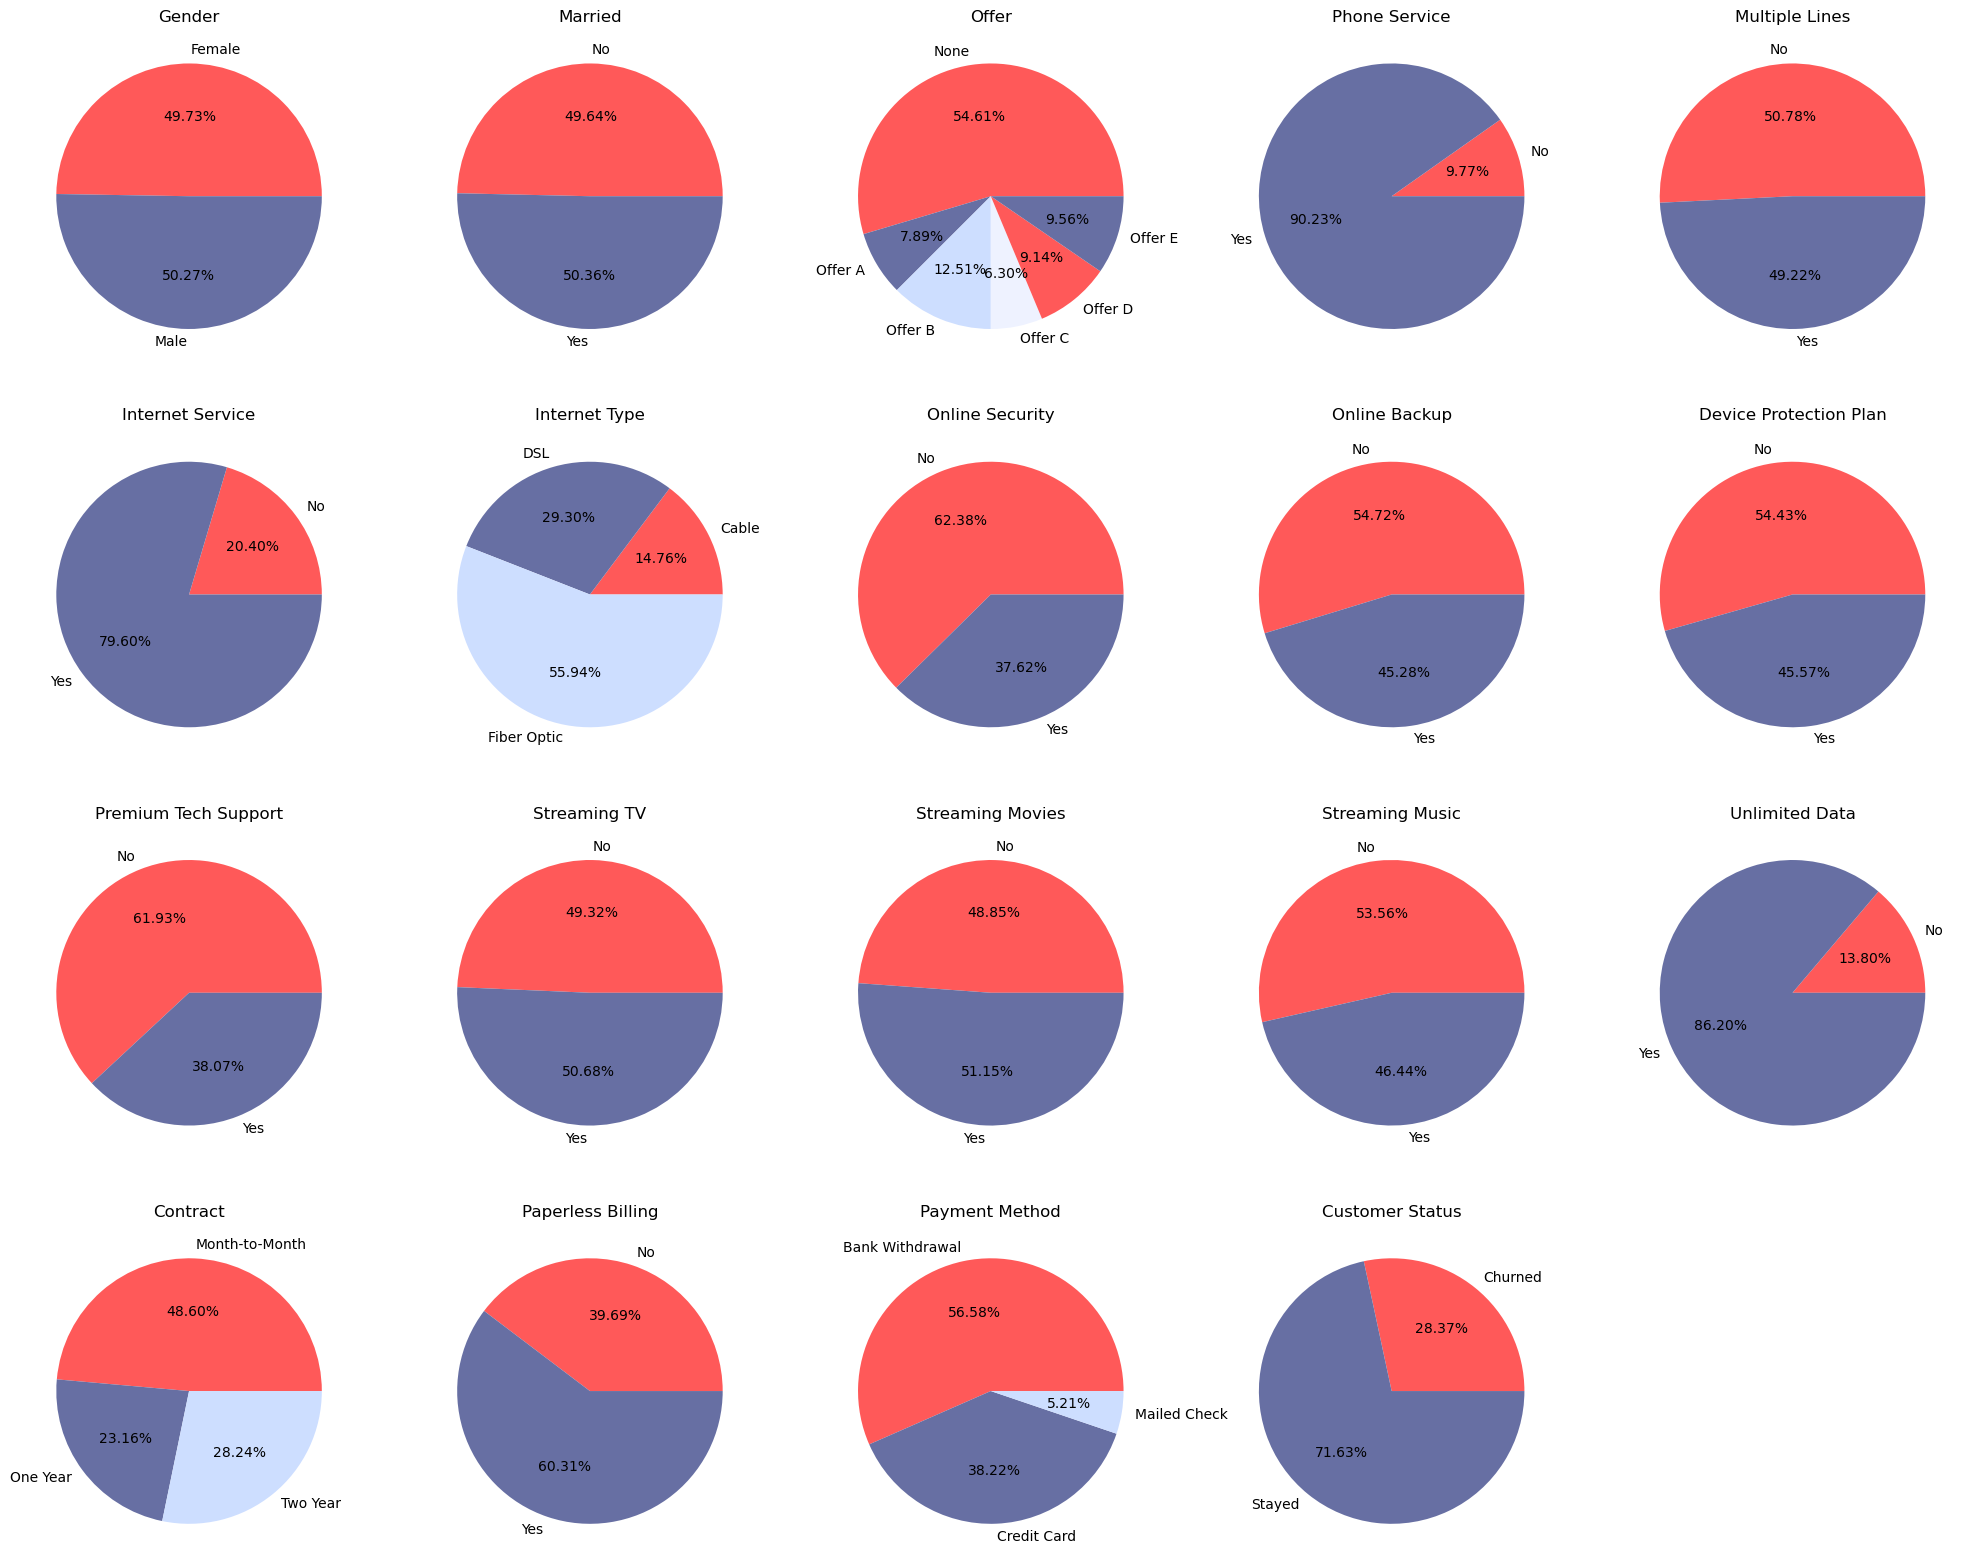

In [27]:
fig = plt.figure(figsize = (25, 25))
data_cat=data_customer[cat]
i=1
for x in cat:
    plt.subplot(5, 5, i)
    ax = data_customer.groupby([x]).size().plot(kind = 'pie', autopct = '%.2f%%', colors = ['#FF5959', '#676FA3','#CDDEFF', '#EEF2FF'])
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(x), loc='center')
    i+=1
plt.show()

In [28]:
#Outcome - We can notice that Offer, Service, Internet Type, Features, Contract have strong impact towards the churning clients or churn rate.
#1.Service- Clients that uses phone service or internet services are more likely to churn
#2.Offers - Most client haven't got any offers
#3.Internet Type - Majority of churned clients are fiberoptic clients
#4.Features- Client with features using online security, online backup, device protection, premium tech support, unlimited data are less likely to churn
#5.Contract - client with monthly subscriptions and bank withddrawels most likely to churn

In [29]:
#Analysis Between High Value Customers and Churned Customers

In [30]:
#High Value Client Definition - Customers who have provided revenue higher than the company's average revenue

In [31]:
data_customer['Total Revenue'].mean()

3235.2180816512373

In [32]:
data_customer['High Value'] = 0
data_customer.loc[data_customer['Total Revenue'] > 3235.2180816512373, 'High Value'] = 'High Value'

In [33]:
df_high_value = data_customer[data_customer['High Value'] == 'High Value']
df_high_value.head()

,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,High Value
6,Female,67,Yes,0,Lompoc,1,71,Offer A,Yes,9.96,...,109.70,7904.25,0.0,0,707.16,8611.41,Stayed,NaN,NaN,High Value
7,Male,52,Yes,0,Napa,8,63,Offer B,Yes,12.96,...,84.65,5377.80,0.0,20,816.48,6214.28,Stayed,NaN,NaN,High Value
9,Female,43,Yes,1,Sheridan,3,65,None,Yes,28.46,...,90.45,5957.90,0.0,0,1849.90,7807.80,Stayed,NaN,NaN,High Value
11,Female,25,Yes,2,Sunnyvale,2,72,None,Yes,16.01,...,116.80,8456.75,0.0,0,1152.72,9609.47,Stayed,NaN,NaN,High Value
13,Female,32,No,0,La Mesa,0,72,Offer A,Yes,2.25,...,101.30,7261.25,0.0,0,162.00,7423.25,Stayed,NaN,NaN,High Value


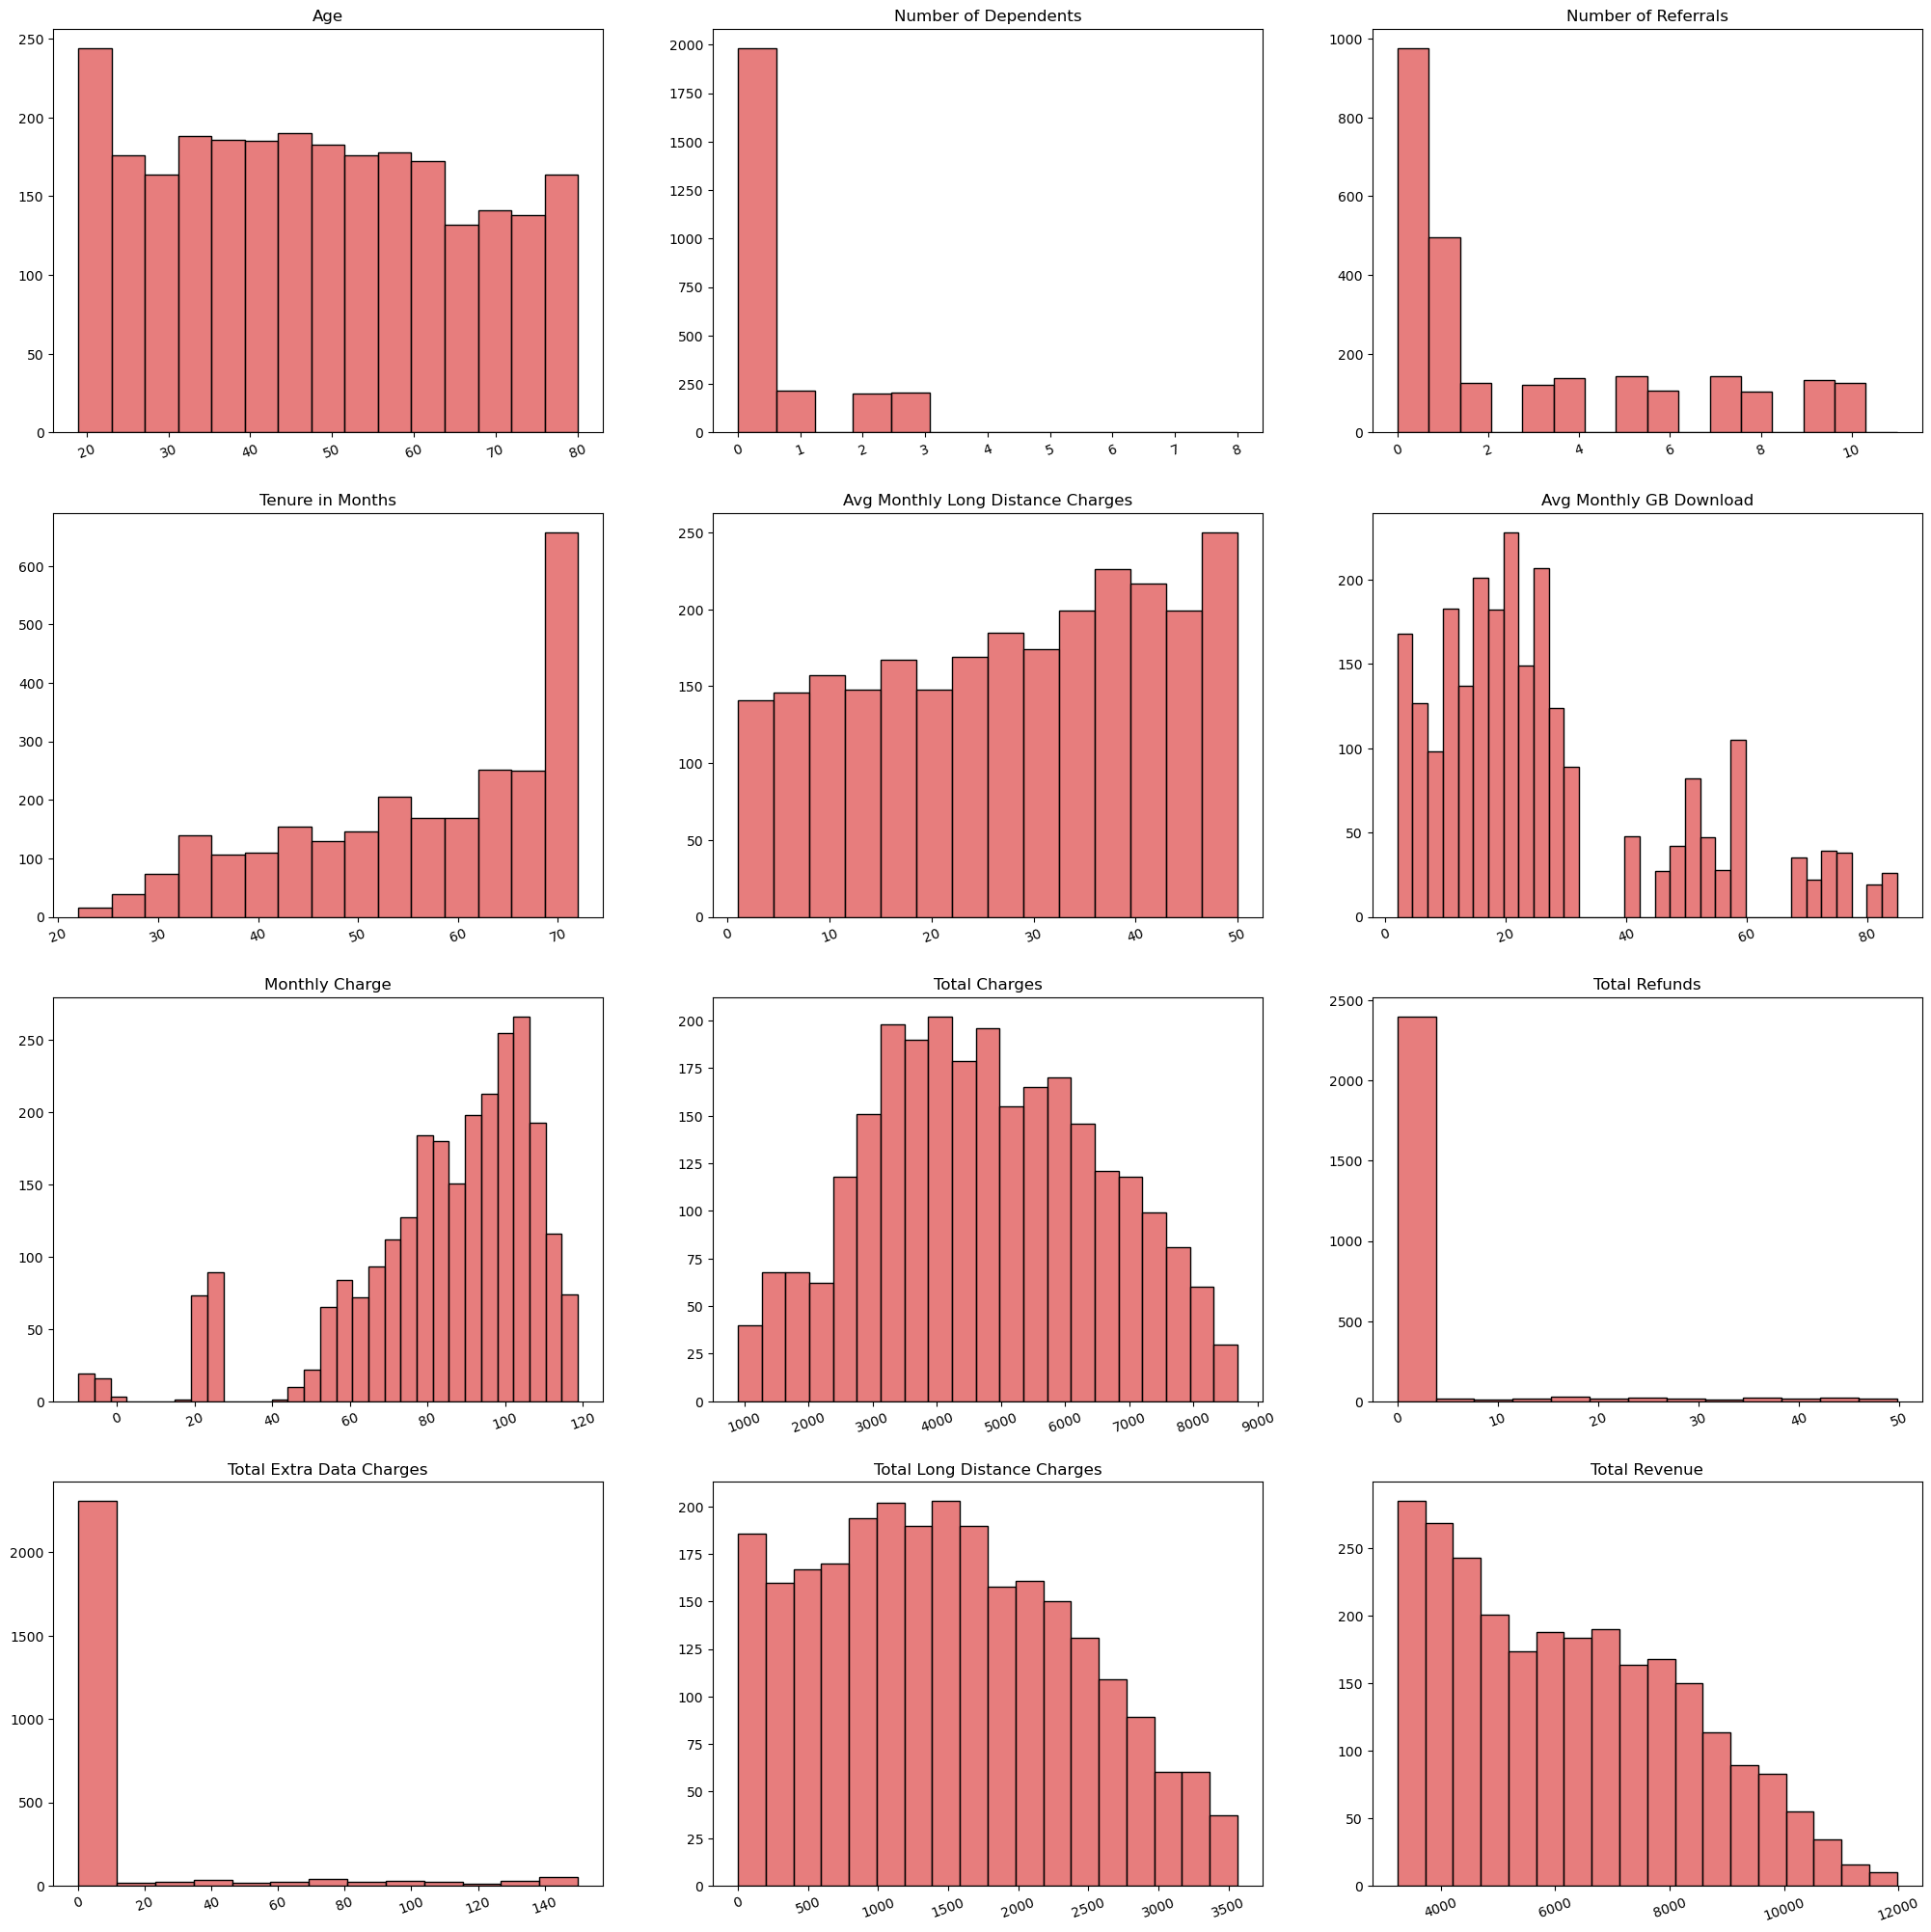

In [34]:
fig = plt.figure(figsize = (25, 25))

i = 1
for x in num:
    plt.subplot(4, 3, i)
    ax = sns.histplot(x = df_high_value[x], color = '#E05252')
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(x), loc = 'center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

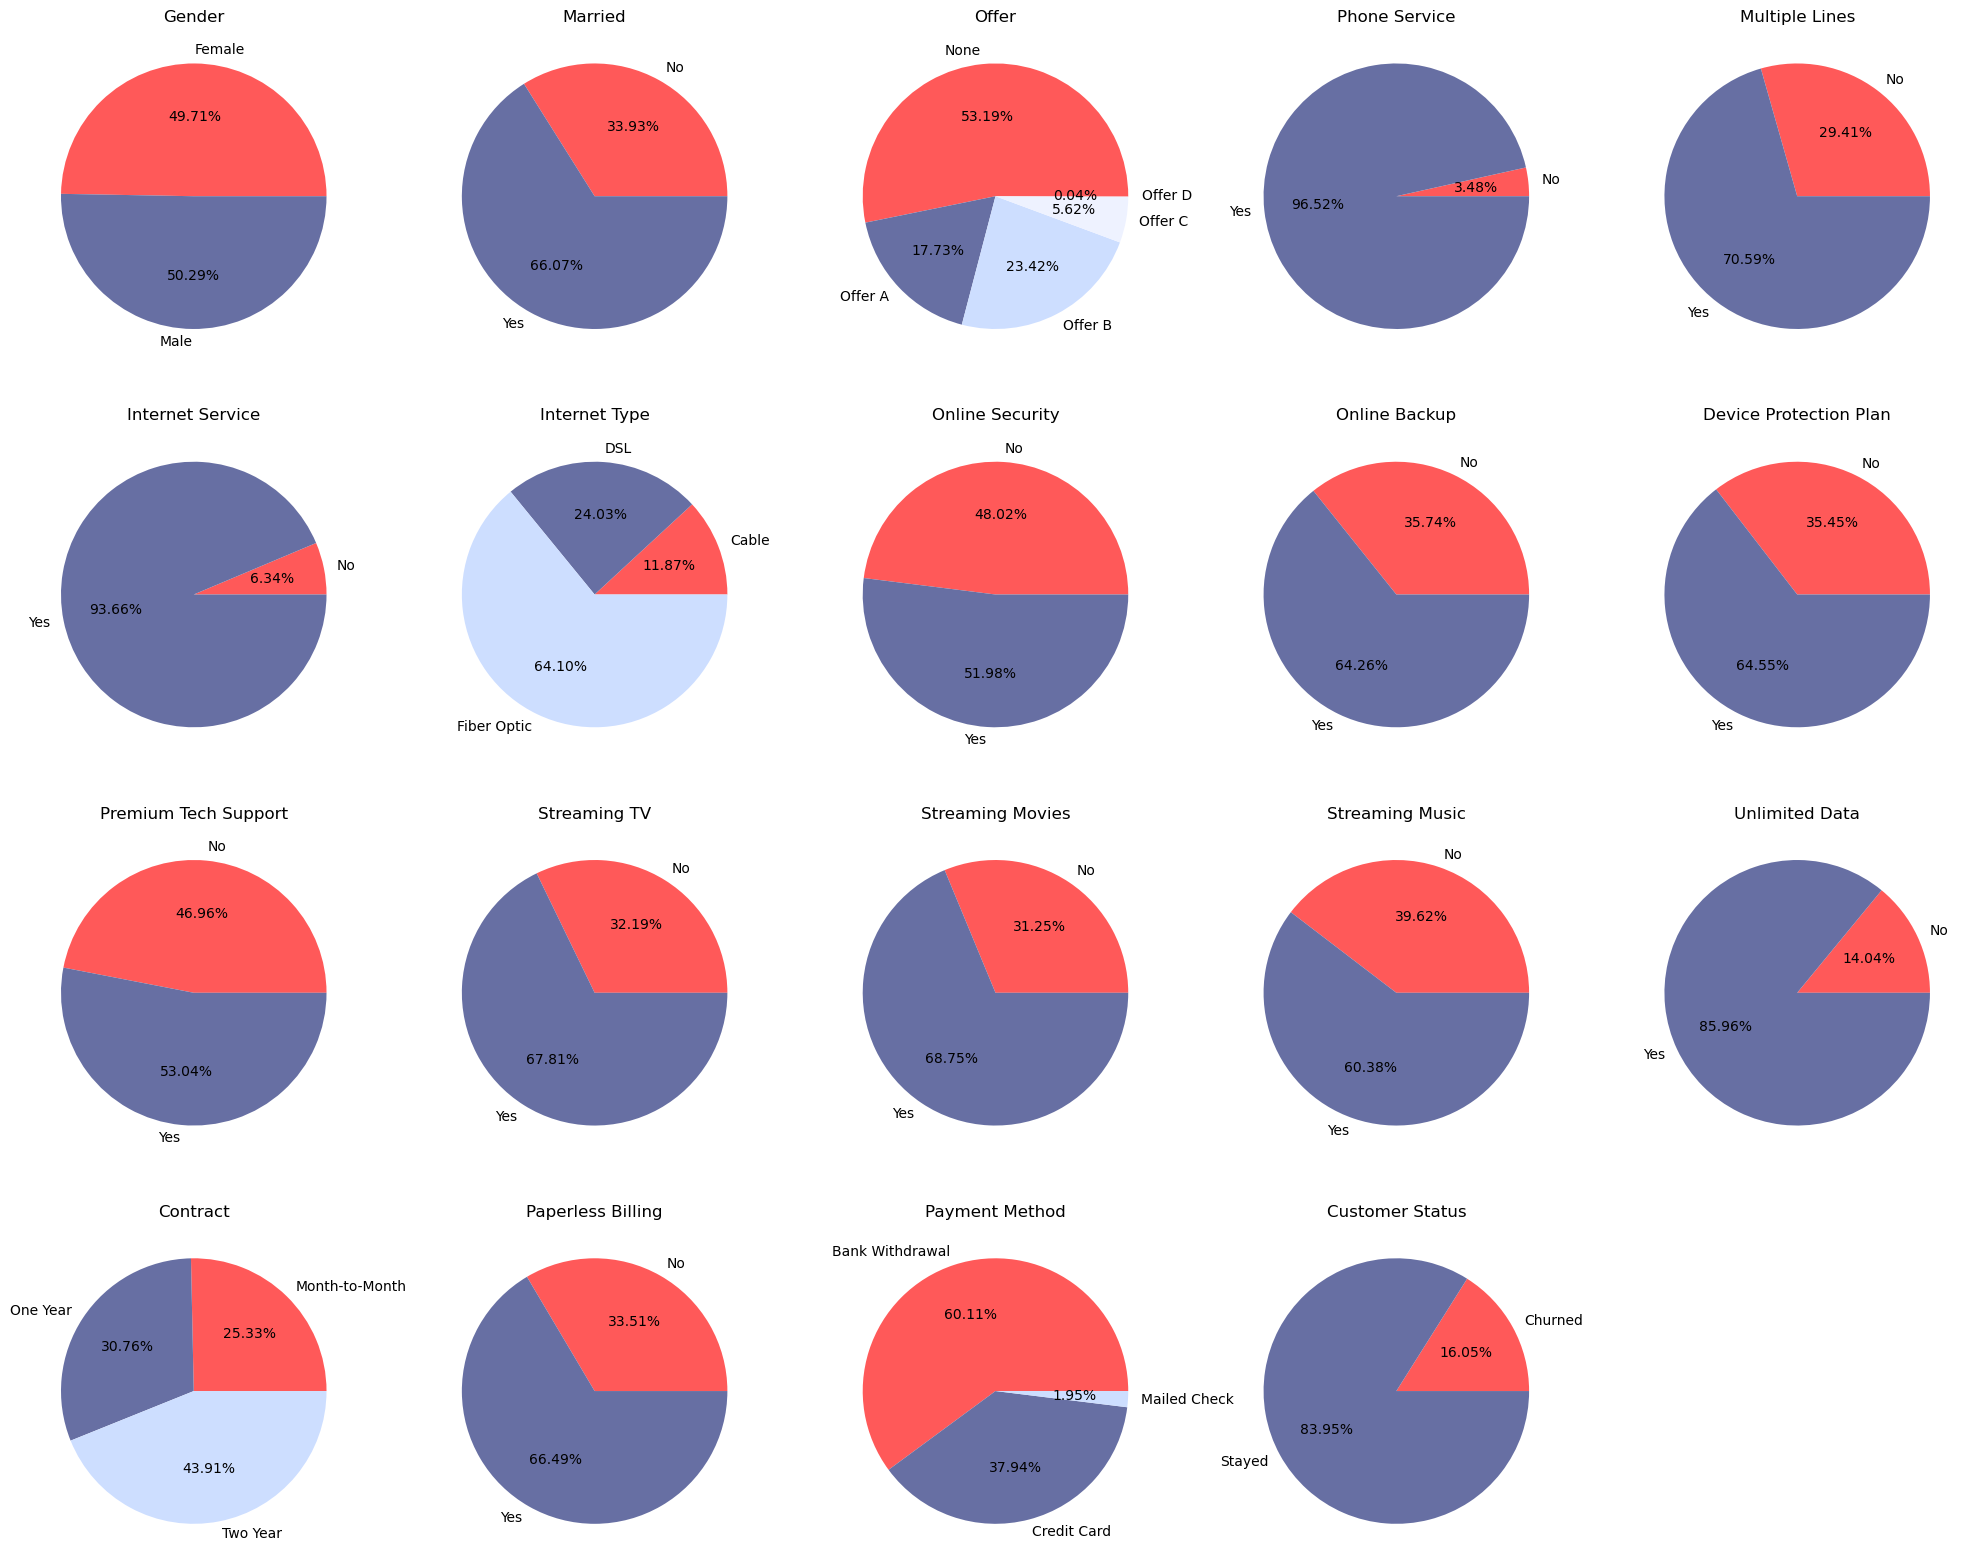

In [35]:
fig = plt.figure(figsize = (25, 25))
i=1
for x in cat:
    plt.subplot(5, 5, i)
    ax = df_high_value.groupby([x]).size().plot(kind = 'pie', autopct = '%.2f%%', colors = ['#FF5959', '#676FA3','#CDDEFF', '#EEF2FF'])
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(x), loc='center')
    i+=1
plt.show()

In [36]:
#Churned Customers Analysis

In [37]:
df_churned = data_customer.loc[data_customer['Customer Status'] == "Churned"]

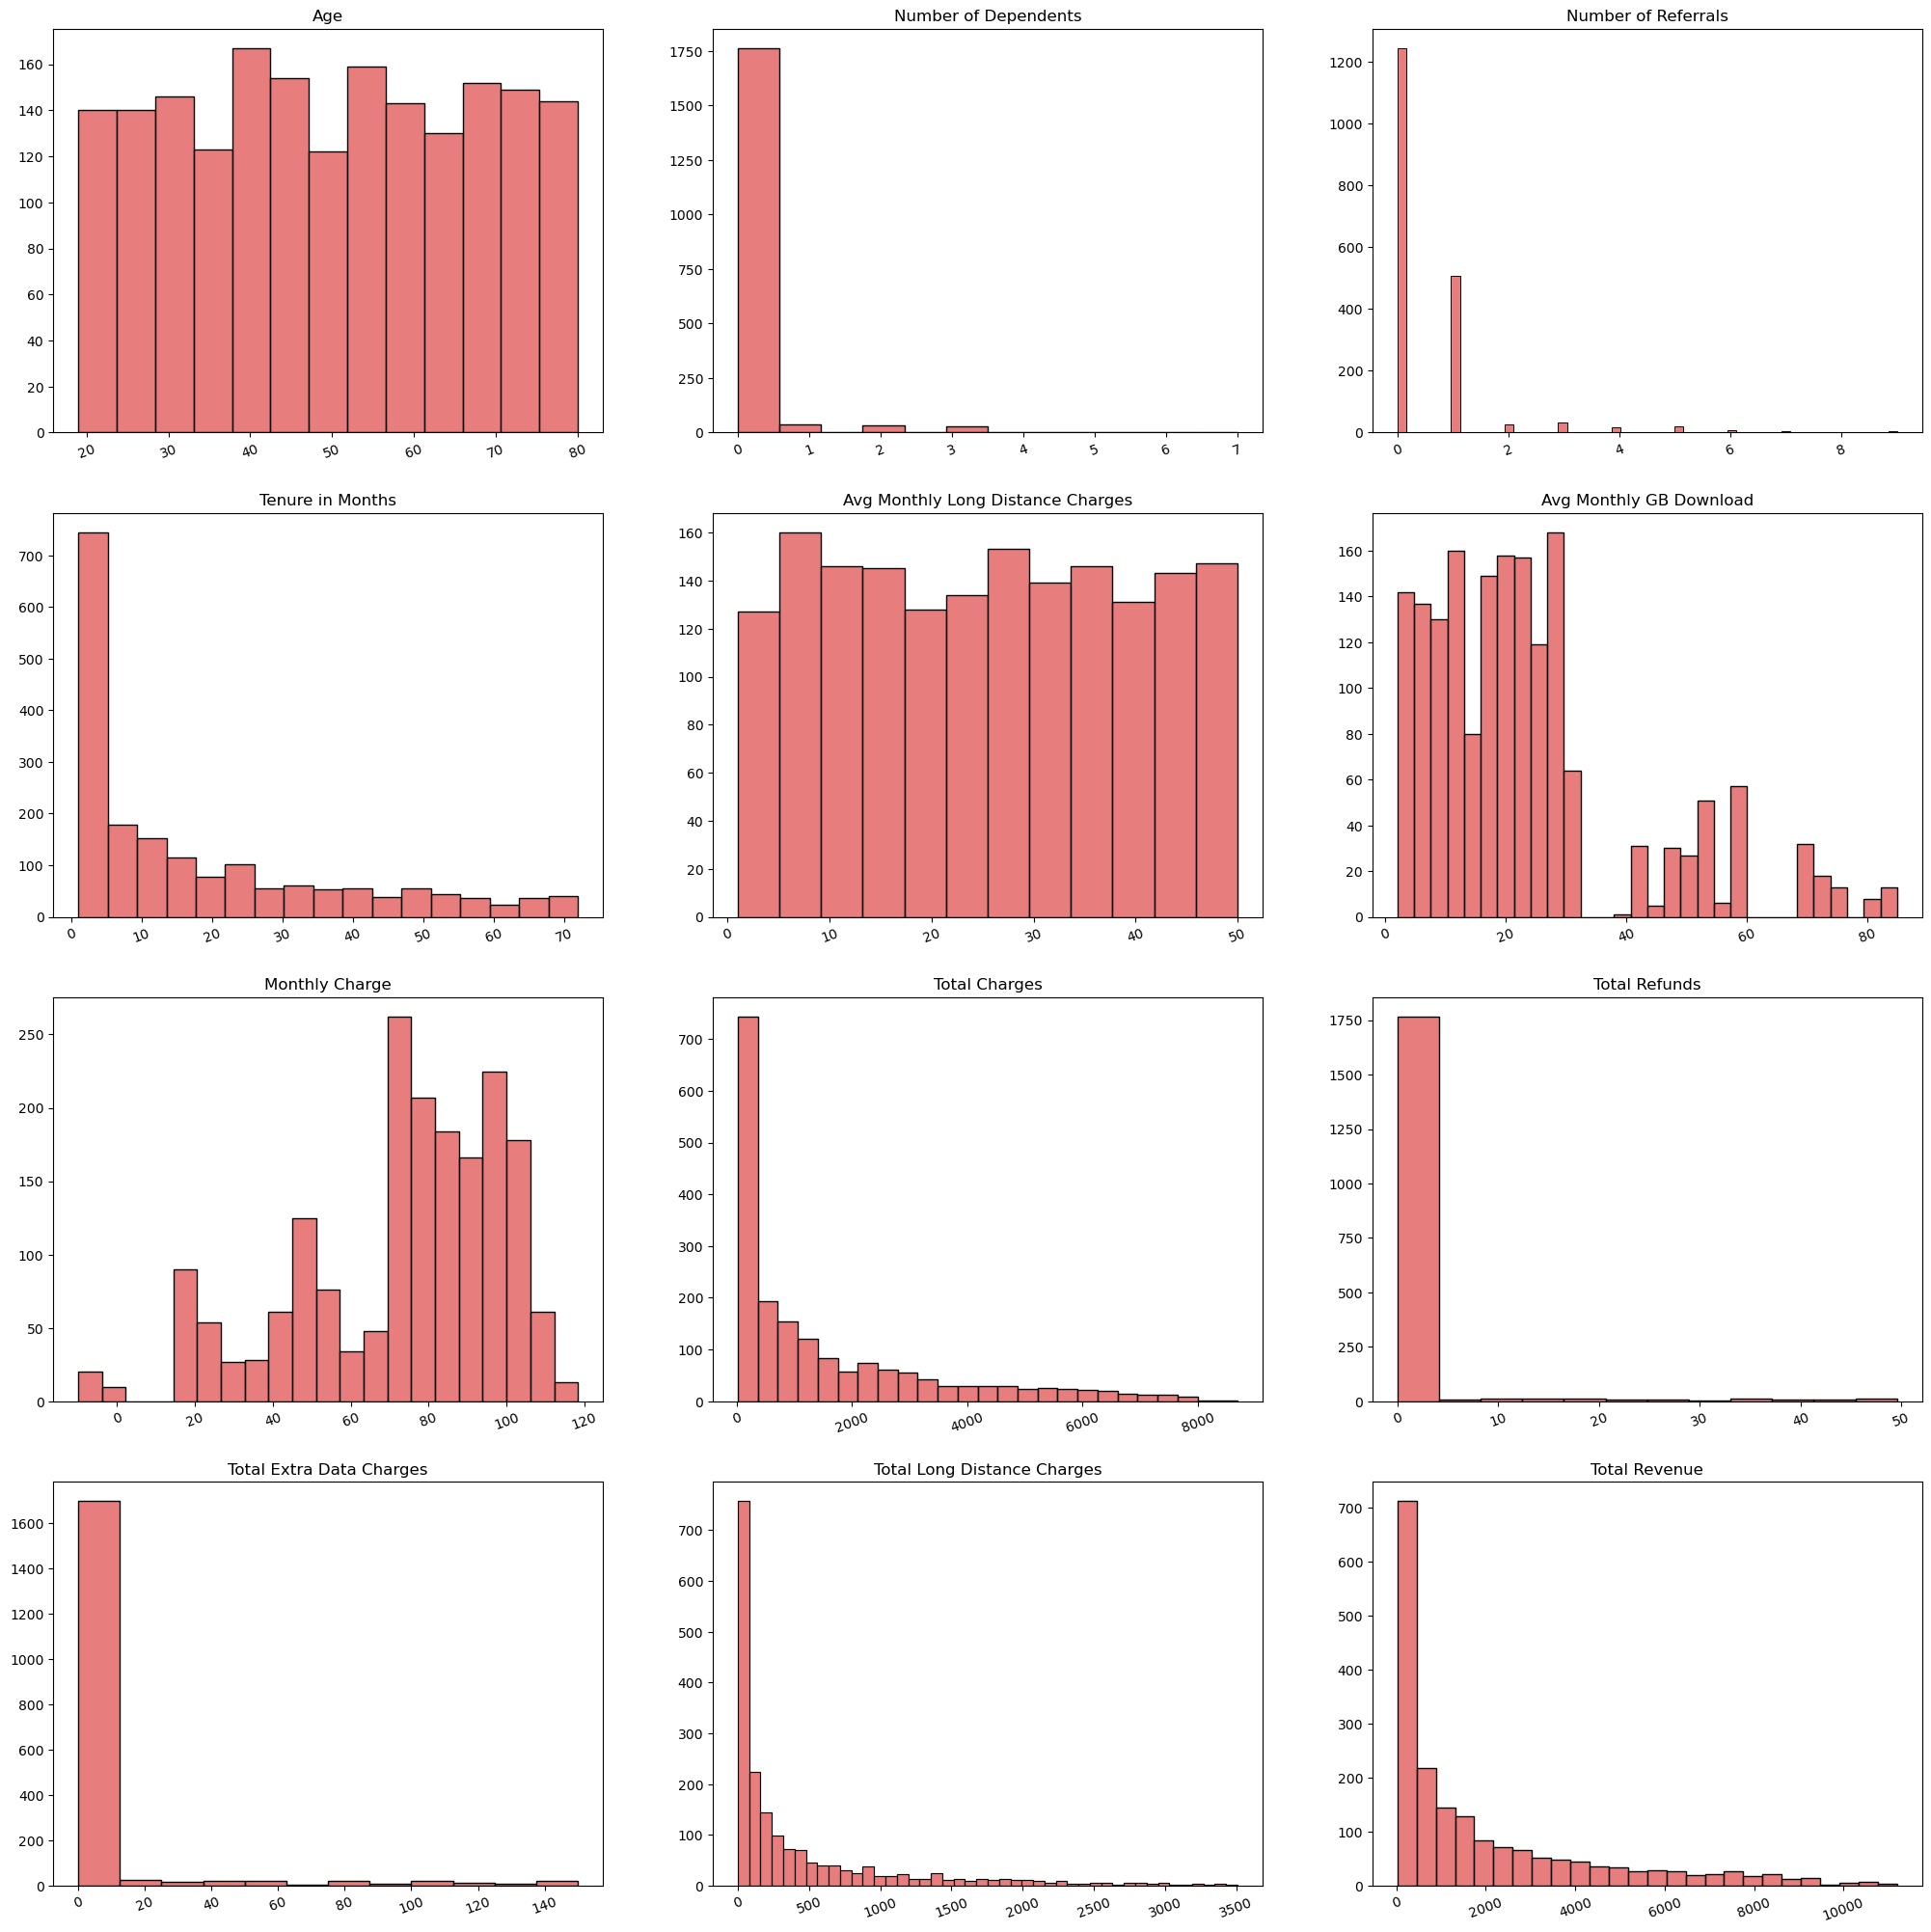

In [38]:
fig = plt.figure(figsize = (25, 25))

i = 1
for x in num:
    plt.subplot(4, 3, i)
    ax = sns.histplot(x = df_churned[x], color = '#E05252')
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(x), loc = 'center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

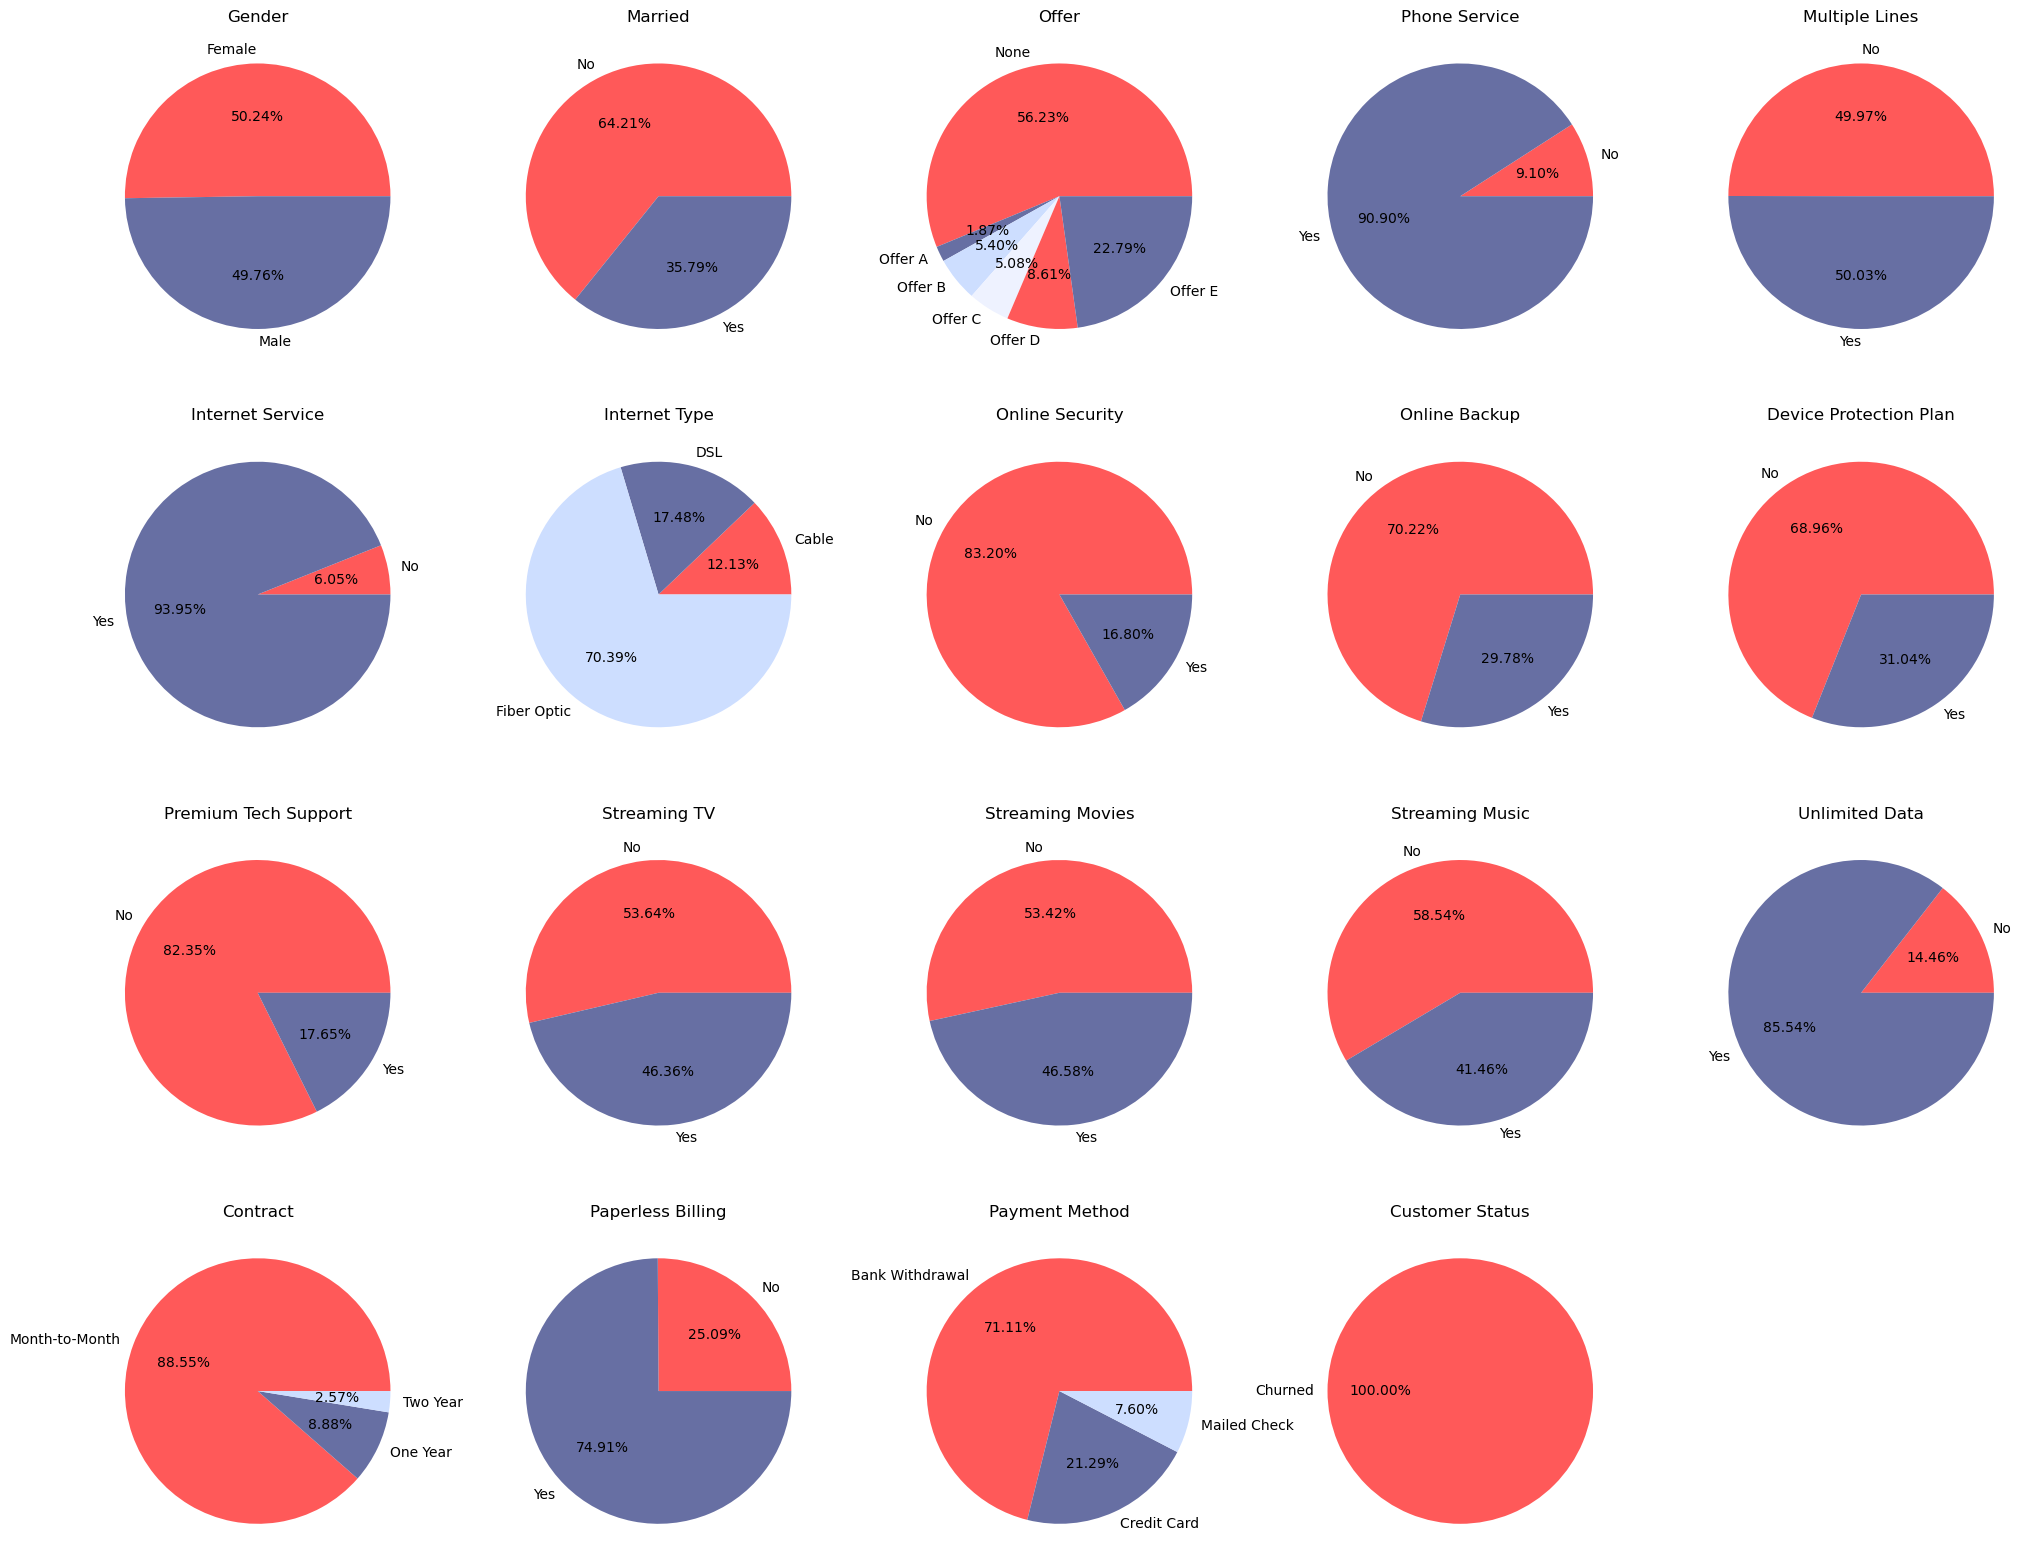

In [39]:
fig = plt.figure(figsize = (25, 25))
i=1
for x in cat:
    plt.subplot(5, 5, i)
    ax = df_churned.groupby([x]).size().plot(kind = 'pie', autopct = '%.2f%%', colors = ['#FF5959', '#676FA3','#CDDEFF', '#EEF2FF'])
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(x), loc='center')
    i+=1
plt.show()

In [40]:
#High Value customers findings---
#1.67.73% are married
#2.More than 50% of this customer segment have subscribed to atleast one of these internet services (backup, security, protection plan, tech support) as well as streaming services (TV, movies, music)
#3.81.66% with long term contracts.
#4.Not purchased offer E

In [ ]:
#Chruned clients findings---
#1.35.79% are married
#2.50% of churned customers have not opted for additional internet services or streaming services.
#3. 88.55% of were on a monthly billing cycle
#4. Has purchased offer E